In [3]:
import json # will be needed for saving preprocessing details
import numpy as np # for data manipulation
import pandas as pd # for data manipulation
from sklearn.model_selection import train_test_split # will be used for data split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder # for preprocessing
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE 
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier # for training the algorithm
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from matplotlib import pyplot

In [4]:
# load dataset
df = pd.read_csv('Data.csv')
array = df.values
print('Shape:', df.shape)
# set input matrix and target column
X = array[:, :-1]
y = array[:, 6]
# show first row of data
print(df.head())
print(df.describe())

Shape: (526, 9)
   Floor_Num  Total_Floor_Area  Column_Area  Concrete_Wall_AreaNS  \
0        2.0            1797.0         6.21                   0.0   
1        1.0             577.0         2.00                   0.0   
2        3.0             498.0         1.50                   0.0   
3        2.0             310.0         1.40                   0.0   
4        3.0             287.0         0.74                   0.0   

   Concrete_Wall_AreaEW  Masonry_Wall_AreaNS  Masonry_Wall_AreaEW  \
0                   0.0                 0.00                 9.49   
1                   0.0                 0.00                 1.68   
2                   0.0                 1.35                 0.40   
3                   0.0                 1.02                 0.00   
4                   0.0                 3.74                 1.74   

   Captive_Columns  Damage_Class  
0                1             4  
1                0             2  
2                0             2  
3             

In [5]:
# taking care of the missing data
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean', verbose = 0)
imputer = imputer.fit(X[:, 1:6]) #upper bound is not included, but lower bound
X[:, 1:6] = imputer.transform(X[:, 1:6])

In [6]:
# encoding the dependent variable
labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)

In [7]:
# rescale data (between 0 and 1)
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

In [8]:
# summarize the class distribution
target = df.values[:, -1]
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%s, Percentage=%.3f%%' % (k, v, per))

Class=4.0, Count=224, Percentage=42.586%
Class=2.0, Count=161, Percentage=30.608%
Class=3.0, Count=87, Percentage=16.540%
Class=1.0, Count=54, Percentage=10.266%


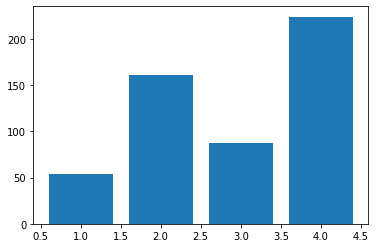

In [9]:
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [10]:
# Re-summarize class distribution
print(X.shape, y.shape,Counter(y))

(526, 8) (526,) Counter({0: 150, 65: 10, 7: 9, 10: 8, 50: 8, 107: 8, 117: 7, 61: 7, 73: 7, 74: 6, 23: 5, 29: 5, 44: 5, 54: 5, 45: 5, 75: 4, 13: 4, 71: 4, 79: 4, 40: 4, 152: 3, 96: 3, 32: 3, 183: 3, 89: 3, 46: 3, 17: 3, 94: 3, 111: 3, 85: 3, 128: 3, 83: 3, 98: 3, 9: 3, 70: 2, 147: 2, 88: 2, 47: 2, 177: 2, 31: 2, 108: 2, 221: 2, 90: 2, 173: 2, 180: 2, 167: 2, 42: 2, 113: 2, 143: 2, 24: 2, 122: 2, 136: 2, 151: 2, 34: 2, 145: 2, 188: 2, 104: 2, 101: 2, 166: 2, 126: 2, 25: 2, 8: 2, 14: 2, 60: 2, 18: 2, 206: 1, 118: 1, 134: 1, 121: 1, 86: 1, 49: 1, 141: 1, 182: 1, 189: 1, 187: 1, 138: 1, 120: 1, 142: 1, 209: 1, 77: 1, 153: 1, 210: 1, 195: 1, 164: 1, 131: 1, 144: 1, 184: 1, 91: 1, 217: 1, 158: 1, 100: 1, 99: 1, 123: 1, 39: 1, 133: 1, 1: 1, 15: 1, 148: 1, 135: 1, 216: 1, 4: 1, 214: 1, 48: 1, 105: 1, 66: 1, 198: 1, 192: 1, 175: 1, 219: 1, 150: 1, 80: 1, 176: 1, 186: 1, 110: 1, 11: 1, 163: 1, 165: 1, 27: 1, 169: 1, 172: 1, 20: 1, 130: 1, 43: 1, 41: 1, 178: 1, 181: 1, 154: 1, 204: 1, 215: 1, 174:

In [12]:
# Implementing SMOTE for the Imbalanced data in Multi-class classification
smote=SMOTE("minority")
X,y=smote.fit_resample(X,y)

C:\Users\DELL\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 6

In [ ]:
print(X.shape, y.shape, Counter(y))

In [ ]:
# To balance another minority class
smote=SMOTE("minority")
X,y=smote.fit_resample(X,y)


In [ ]:
# Re-summarize class distribution
print(X.shape, y.shape,Counter(y))

In [ ]:
# data split train/test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=1234)

In [ ]:
# Feature Scaling - 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['1'] = RandomForestClassifier(max_features=1)
    models['2'] = RandomForestClassifier(max_features=2)
    models['3'] = RandomForestClassifier(max_features=3)
    models['4'] = RandomForestClassifier(max_features=4)
    models['5'] = RandomForestClassifier(max_features=5)
    models['6'] = RandomForestClassifier(max_features=6)
    return models  

In [ ]:
# evaluate a give model using cross-validation
from sklearn.model_selection import cross_val_score
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [ ]:
# get the models to evaluate
models = get_models()

In [ ]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

In [ ]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)